# IMPORTING THE Moderna DATA-SET 
* The following data-set consist of tweets from the month of 'January' to the month of 'May'based on the keyword [Moderna]  which has been scrapped from twitter  using the library called snscrape
* Our scrapped data consist of the Url, date of the tweet, tweet_content, tweet_id
* For our Analysis we will be only making use of the tweet content inorder to get the sentiment Analysis for the given time duration 



In [2]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Moderna_Tweets_01-05.csv',low_memory=False)
df

,Unnamed: 0,Unnamed: 0.1,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,0,snscrape.modules.twitter.Tweet,https://twitter.com/BEMSOPS/status/13451578063...,2021-01-01 23:59:47+00:00,36 hours since receiving my first dose of the ...,36 hours since receiving my first dose of the ...,1345157806341709826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,5,0,1345157806341709826,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,snscrape.modules.twitter.Tweet,https://twitter.com/ElNoMuerto2/status/1345157...,2021-01-01 23:59:37+00:00,@WalterEnriqueSv Jajajajajajaja tan inocente! ...,@WalterEnriqueSv Jajajajajajaja tan inocente! ...,1345157763475910656,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1344806318360682497,es,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,NaN,NaN,NaN,NaN,NaN,1.345154e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN
2,2,2,snscrape.modules.twitter.Tweet,https://twitter.com/toni_op/status/13451577357...,2021-01-01 23:59:30+00:00,"@arsenismash Arseni, el primer año Olímpico im...","@arsenismash Arseni, el primer año Olímpico im...",1345157735797710854,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,0,1344715055032627206,es,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,NaN,NaN,NaN,NaN,NaN,1.344715e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN
3,3,3,snscrape.modules.twitter.Tweet,https://twitter.com/EatonRose1/status/13451577...,2021-01-01 23:59:30+00:00,Huge mistake was putting Pence\nin charge of t...,Huge mistake was putting Pence\nin charge of t...,1345157734665076736,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,3,2,0,1345157734665076736,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,['https://twitter.com/WitmerCarl/status/134515...,['https://t.co/KG5karFXw9'],NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,snscrape.modules.twitter.Tweet,https://twitter.com/homelesman/status/13451576...,2021-01-01 23:59:06+00:00,"Posted 2018, how the Conservatives spy &amp; t...","Posted 2018, how the Conservatives spy &amp; t...",1345157635981647877,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,0,1345157635981647877,en,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://twitter.com/#!/download/ipad,Twitter for iPad,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.Video', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71495,14995,495,snscrape.modules.twitter.Tweet,https://twitter.com/a_centrism/status/13994895...,2021-05-31 22:14:49+00:00,Did this campaign work?\n\nIt sure as hell did...,Did this campaign work?\n\nIt sure as hell did...,1399489570429886465,"{'_type': 'snscrape.modules.twitter.User', 'us...",5,0,54,0,1399451489001672710,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,NaN,NaN,NaN,NaN,NaN,1.399489e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN,NaN,NaN,NaN,NaN
71496,14996,496,snscrape.modules.twitter.Tweet,https://twitter.com/Poldox_/status/13994894024...,2021-05-31 22:14:09+00:00,@TheRecteur @Mediavenir je suis totalement d’a...,@TheRecteur @Mediavenir je suis totalement d’a...,1399489402448056320,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,139944431695150694

# The tweet_content which we want to deal  with 

In [3]:
df = df[df["lang"]== 'en']


In [4]:
df['content']

0        36 hours since receiving my first dose of the ...
3        Huge mistake was putting Pence\nin charge of t...
4        Posted 2018, how the Conservatives spy &amp; t...
5        Forty-four people received an antibody treatme...
6        @houndcl @VPrasadMDMPH Keep in mind it’s 21 da...
                               ...                        
71478    @ToddClancy3 @moderna_tx @NRPublicHealth My pr...
71487    Singapore to start vaccinating 12-18 year-olds...
71489    @anneekins If the 88 year old one got moderna ...
71492    They gave them Moderna by accident!!! It’s bad...
71495    Did this campaign work?\n\nIt sure as hell did...
Name: content, Length: 43147, dtype: object

# DATA ANALYSIS

In [5]:
!pip install texthero


     |████████████████████████████████| 1.5 MB 8.0 MB/s 
     |████████████████████████████████| 235 kB 62.6 MB/s 
     |████████████████████████████████| 749 kB 52.7 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


# We  use text Hero Package so that we can get a count of the most recurrent words in the all the scrapped tweets 

* From the given count we can see that word Moderna seems to be having the highest count amoung all the tweets from our data-set
* This provides us an overview of the data which is not cleaned 

In [6]:
import numpy as np
import pandas as pd
from copy import deepcopy

import texthero as hero
hero.top_words(df['content'].pipe(hero.clean))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


moderna        45794
pfizer         17276
vaccine        15797
co             14516
https          14362
               ...  
adaliabooks        1
yd0izbkcug         1
thornstab          1
3b5k7asrug         1
jic4mgqven         1
Name: content, Length: 58382, dtype: int64

## With the help of WordCloud we can visualize the most occuring words in our data-set based on the size of the word (Greater the size of the word greater is its occurance)
* From the given visualization we can see  that the most occuring word appears to be Delta Variant although the  data-set is not fully cleaned.

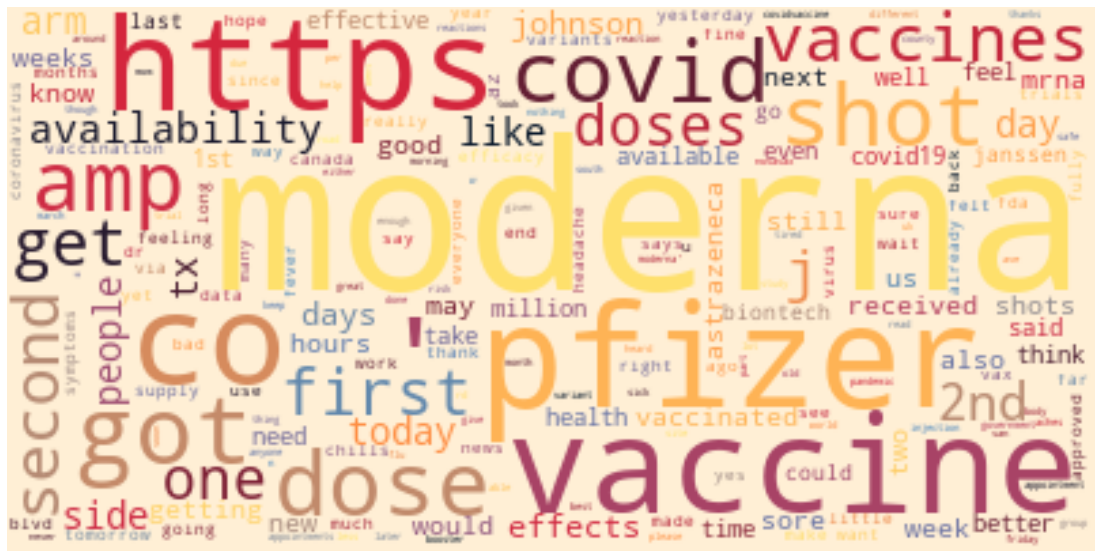

In [7]:
hero.wordcloud(df['content'].pipe(hero.clean))

# DATA PREPROCESSING (CLEANING)

---



In [8]:
!pip install clean-text

     |████████████████████████████████| 170 kB 5.3 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=6bac98a72d8010732dfd13ac357ab29acd83b8031b23e0314cf7a5d54a882090
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=253ac17db0cce2420ababd4fd2199d16d04eddeeb83b0725eee730a71533779d
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built ftfy emoji



## In this step we are cleaning newline '\n' from the tweets 

In [9]:
import html
for i in range (len(df['content'])):

  x = df['content'].replace('\n','') #cleaning newline “\n” from the tweets
df['content'][i] = html.unescape(x)
df['content'].head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0     36 hours since receiving my first dose of the ...
3     Huge mistake was putting Pence\nin charge of t...
4     Posted 2018, how the Conservatives spy &amp; t...
5     Forty-four people received an antibody treatme...
6     @houndcl @VPrasadMDMPH Keep in mind it’s 21 da...
10    Day 3 of #covid_19 moderna vaccine. No issues....
11    @omnomcake_ @malo840 @OctagonRon Both Pfizer a...
12    Loreal the correct purchase and upgrade inform...
13    @Tim_Beezewax @nycsouthpaw @JillFilipovic @NYG...
14    @PhilippineStar Highly commendable move by the...
Name: content, dtype: object

# Importing NLTK libraries like stopwards and word_tokenize to perform the following Pre-Processng Tasks 
* Lowercasing all your letters 
* Removing hashtags, mentions, and links
* Punctuations removal (including filtering non-alphanumeric characters if necessary)
* Tokenization
* Stop words removal

In [23]:
df['content']=df['content'].str.lower()
tweet=df['content'].values.tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
import pandas as pd
import html
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
 
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [25]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
results = [clean_tweet(tw) for tw in tweet]


# IMPORTING TEXTBLOB LIBRARY TO PERFORM SENTIMENT ANALYSIS 


In [26]:
from textblob import TextBlob

import tweepy 
import sys 

# In this step we are filtering out all  the '@usernames:' and then performing sentiment Analysis based on the Polarity of the tweets 
* The tweets which have polarity greater then 0 are classified to be having positive sentiments 
* The tweets which have polarity less then 0 are classified t be having negitive sentiments 
* The rest of the tweets are considered to be Neutral tweets 

In [27]:
polarity = 0 
positive = 0 
negitive = 0 
neutral = 0

for tweet in results :
  final_text = tweet.replace('RT','')
  if final_text.startswith('@'):
    position = final_text.index(':')
    final_text = final_text[position+2:]
  if final_text.startswith('@'):
    position = final_text.index('')
    final_text = final_text[position+2:]
  analysis = TextBlob(final_text) 
  tweet_polarity = analysis.polarity
  if tweet_polarity > 0 :
    positive += 1 
  elif tweet_polarity< 0 :
    negitive += 1 
  else:
    neutral += 1
  polarity += tweet_polarity
print(polarity)
print(f'Amount of positive tweets:{positive}')
print(f'Amount of negitive tweets:{negitive}')
print(f'Amount of neutral tweets:{neutral}')


3594.619851684514
Amount of positive tweets:20523
Amount of negitive tweets:7872
Amount of neutral tweets:14752


In [28]:
import matplotlib.pyplot as plt
df1 = pd.DataFrame (results, columns = ['cleaned_tweets'])
df1


,cleaned_tweets
0,36 hours since receiving first dose moderna va...
1,huge mistake putting pence charge task force a...
2,posted 2018 conservatives spy amp terror netwo...
3,forty four people received antibody treatment ...
4,keep mind 21 days pfizer versus 28 days moderna
...,...
43142,preference pfizer doesnt anything effectivenes...
43143,singapore start vaccinating 12 18 year olds pm...
43144,88 year old one got moderna first dose sobeys ...
43145,gave moderna accident bad enough emergency vax...


# Getting the Subjectivity and the Polarity of the tweets 

In [29]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity


df1['Subjectivity']  = df1['cleaned_tweets'].apply(getSubjectivity)
df1['Polarity']  = df1['cleaned_tweets'].apply(getPolarity)


In [ ]:
df1

,cleaned_tweets,Subjectivity,Polarity
0,brevinor stock u k almost 12 months causing de...,0.600000,0.700000
1,second jab appointment canceled bc political f...,0.200000,0.166667
2,pfizer biontech highly modified ivt rna action...,0.413333,0.053333
3,almost 13 000 pfizer biontech vaccines given w...,0.250000,-0.250000
4,prof linda leave pfizer plans well using less ...,0.140476,-0.119048
...,...,...,...
16371,held accountable administering vaccine know fu...,0.500000,0.016667
16372,date 3 250 161 doses pfizer biontech moderna a...,0.000000,0.000000
16373,locked 12 months due health lost work masked f...,0.680556,0.113889
16374,thats democracy works dont need experimental c...,0.400000,0.100000


# Here we can visualize a Word Cloud of the cleaned tweets 

In [30]:
from wordcloud import WordCloud

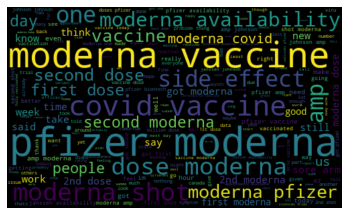

In [31]:
allWords = ''.join([twts for twts in df1['cleaned_tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# create a function to compute the negitive neutral and positive analysis and add it as a column in the dataframe 


In [32]:
def getAnalysis(score):
  if score < 0:
    return 'Negitive'
  elif score == 0:
    return 'Neutral'  
  else:
    return 'Positive'



df1['Sentiments'] = df1['Polarity'].apply(getAnalysis)
df1

,cleaned_tweets,Subjectivity,Polarity,Sentiments
0,36 hours since receiving first dose moderna va...,0.333333,0.250000,Positive
1,huge mistake putting pence charge task force a...,0.375000,0.137500,Positive
2,posted 2018 conservatives spy amp terror netwo...,0.000000,0.000000,Neutral
3,forty four people received antibody treatment ...,0.000000,0.000000,Neutral
4,keep mind 21 days pfizer versus 28 days moderna,0.000000,0.000000,Neutral
...,...,...,...,...
43142,preference pfizer doesnt anything effectivenes...,0.500000,0.000000,Neutral
43143,singapore start vaccinating 12 18 year olds pm...,0.000000,0.000000,Neutral
43144,88 year old one got moderna first dose sobeys ...,0.266667,0.175000,Positive
43145,gave moderna accident bad enough emergency vax...,0.666667,-0.400000,Negitive


# print all the postive tweets 


In [33]:
j =1 
sortedDF =df1.sort_values(by=['Polarity'])
for i in range (0,sortedDF.shape[0]):
  if(sortedDF['Sentiments'][i]=='Positive'):
    print(str(j) + ')' + sortedDF['cleaned_tweets'][i])
    print()
    j= j+1


Streaming output truncated to the last 5000 lines.
18024)moderna vaccines already announced morrison hunt renouncement differs promised delivery time new announcement delays delivery end 2021 middle

18025)2 277 318 doses pfizer biontech moderna astrazeneca covid 19 vaccines administered b c 2 162 023 first doses 115 295 second doses

18026)assuming talking moderna pfizers jabs theyre absolutely tested theyre safe though theres medical intervention even tylenol vicks vapor rub comes without risk sharply reduce overall risk dying theyre absolutely vaccines

18027)bio space comparisons pfizer 95 effective 19 50p dose moderna 95 effective 25 p dose astrazeneca 70 effective 2 15 p dose lucky 50 get ineffective cheapest vaccine lucky

18028)definitely get second worked day moderna say bad hangover true took advil faked happy lol chills fever muscle aches totally doable though like dying promise

18029)terribly high fever following night second moderna shot might want plan 2 days following s

# print all the negitive tweets 


In [34]:
j =1 
sortedDF =df1.sort_values(by=['Polarity'],ascending ='False')
for i in range (0,sortedDF.shape[0]):
  if(sortedDF['Sentiments'][i]=='Negitive'):
    print(str(j) + ')' + sortedDF['cleaned_tweets'][i])
    print()
    j= j+1

Streaming output truncated to the last 5000 lines.
5373)pleased report ill side effects pain shoulder saturday morning pic sat trying take easy case would get sick

5374)feel like get moderna round vaccine crew extended family pfizers couple astrazenecas obviously get whatever

5375)essex county covid vaccination results moderna 1st doses today 985 total 161 881 2nd doses today 3 321 total 111 650 senior transportation today 89 total 3 732 teachers total 2 955 j amp j mobile sites vulnerable population kmart sears total 12 604

5376)moderna 24 hours super exhausted could slept hours

5377)yay save came ill moderna squad thursday

5378)moms nurse said could happen long week pfizer reference still really exhausted days 2nd moderna seems kinda usual

5379)az worse moderna big scam politicians whore invested moderna

5380)reminder vaccine clinic back starting tomorrow see 7 30 delany center campus please remember clinic people experiencing homelessness vaccine administered moderna

5381)im

# get percentage of positive tweets 


In [35]:
ptweets = df1[df1.Sentiments=='Positive']
ptweets = ptweets['cleaned_tweets']

round( (ptweets.shape[0] / df1.shape[0])* 100 , 1 )

47.6

# get percentage of negitive tweets 


In [36]:
Ntweets = df1[df1.Sentiments=='Negitive']
Ntweets = Ntweets['cleaned_tweets']

round( (Ntweets.shape[0] / df1.shape[0])* 100 , 1 )

18.2

# get percentage of Neutral tweets 

In [37]:

Netweets = df1[df1.Sentiments=='Neutral']
Netweets = Netweets['cleaned_tweets']

round( (Netweets.shape[0] / df1.shape[0])* 100 , 1 )

34.2

In [38]:

# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df1['labeled_sentiments']= label_encoder.fit_transform(df1['Sentiments'])
 



# Visualizing the Sentiment % with the help of  Pie Chart 

[47.6, 18.2, 34.2]
['Positive_Sentiments', 'Negitive_sentiments', 'Neutral_sentiments']


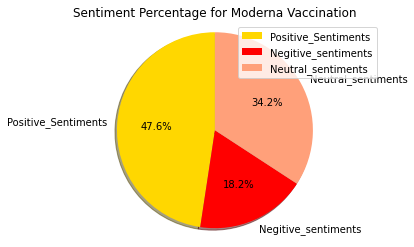

In [40]:
topic = ['Positive_Sentiments', 'Negitive_sentiments', 'Neutral_sentiments']
Postive_percentage = [47.6,18.2,34.2]


sizes = Postive_percentage
print(sizes)
labels = list(topic)
# makeitastring = ''.join(map(str, labels))
print(labels)
colors = [ 'gold', 'red', 'lightsalmon', 'darkred']
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)   #line 240
#plt.pie(sizes, labels, colors)
plt.axis('equal')
plt.title('Sentiment Percentage for Moderna Vaccination')
plt.legend()
plt.show()

# Visualizing the sentiments with the help of a bar graph

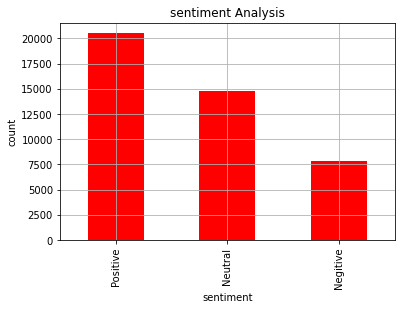

In [41]:
#show the value counts 
df1['Sentiments'].value_counts()
# plot and visualize the counts 
plt.title('sentiment Analysis')
plt.xlabel('sentiment')
plt.ylabel('count')
df1['Sentiments'].value_counts().plot(kind = 'bar',color = 'Red')
plt.grid()
plt.show()


# plotting polarity and subjectivity for the three category of tweets 

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4773a9c5f0> (for post_execute):


KeyboardInterrupt: ignored

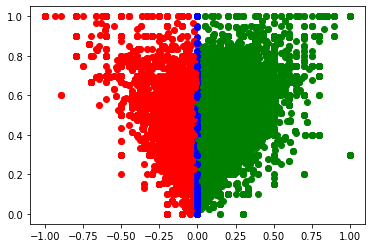

In [42]:
for index, row in df1.iterrows():
  if row['Sentiments']=='Positive':
    plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
  elif row['Sentiments']=='Negitive': 
     plt.scatter(row['Polarity'],row['Subjectivity'],color='red') 
  elif row['Sentiments']=='Neutral':
    plt.scatter(row['Polarity'],row['Subjectivity'],color='blue') 
plt.title('delta variant sentment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [43]:
Positive_sent = df1[df1["Sentiments"] == 'Positive']
Negitive_sent = df1[df1["Sentiments"] == 'Negitive']
Neutral_sent = df1[df1["Sentiments"] == 'Neutral']

# Positive tweets word cloud

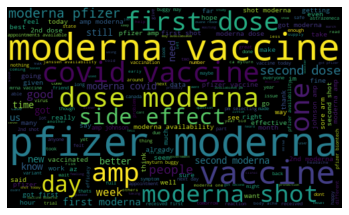

In [44]:
allWords = ''.join([twts for twts in Positive_sent['cleaned_tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Negitive tweets word cloud

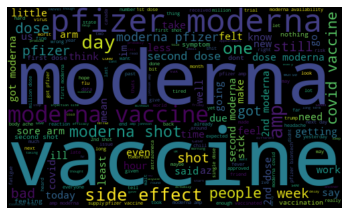

In [45]:
allWords = ''.join([twts for twts in Negitive_sent['cleaned_tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Neutral tweets word cloud

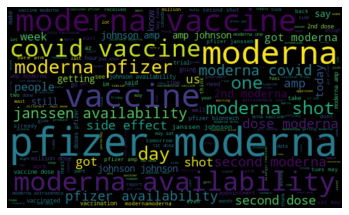

In [46]:
allWords = ''.join([twts for twts in Neutral_sent['cleaned_tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
